# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


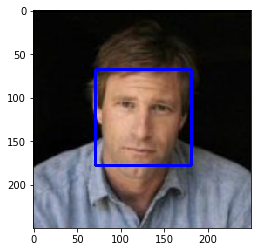

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Percentage of human faces detected in human dataset is 96 and percent of human faces detected in dog dataset is 18

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

exception_list = []
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_detected_in_humans_counter = 0
human_detected_in_dogs_counter = 0

for human in human_files_short:
    if(face_detector(human)):
        human_detected_in_humans_counter += 1
    else:
        exception_list.append(human) 

for dog in dog_files_short:
    if(face_detector(dog)):
        human_detected_in_dogs_counter += 1
        exception_list.append(dog)

print('Percentage of humans detected in human dataset is '+str(human_detected_in_humans_counter)+' and Percentage of human face detected in dog dataset is '+str(human_detected_in_dogs_counter) )


Percentage of humans detected in human dataset is 96 and Percentage of human face detected in dog dataset is 18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

Answer - Using Facenet pytorch pretrained model human face detection in human lfw dataset is 100% accurate while in dog's dataset its still 18 misclassified dog images. FaceNet Implementation taken from <a href="https://github.com/timesler/facenet-pytorch">FaceNet Pytorch Github</a>

In [6]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

### facenet pytorch
from facenet_pytorch import MTCNN
from PIL import Image
mtcnn = MTCNN(keep_all=True)

def detect_face_deepnet(imgpath):
    img = Image.open(imgpath)
    mtcnn.eval()
    with torch.no_grad():
        boxes, probs = mtcnn.detect(img)
    if round(probs[0]) == 1:
        return True
    else:
        return False

In [24]:
exception_list_mtcnn = []
human_detected_in_humans_counter = 0
human_detected_in_dogs_counter = 0
for human in human_files_short:
    if(detect_face_deepnet(human)):
        human_detected_in_humans_counter += 1
    else:
        exception_list_mtcnn.append(human) 

for dog in dog_files_short:
    if(face_detector(dog)):
        human_detected_in_dogs_counter += 1
        exception_list_mtcnn.append(dog)

print('Percentage of humans detected in human dataset is '+str(human_detected_in_humans_counter)+' and Percentage of human face detected in dog dataset is '+str(human_detected_in_dogs_counter)+' using pretrained network' )

Percentage of humans detected in human dataset is 100 and Percentage of human face detected in dog dataset is 18 using pretrained network


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [25]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
print(use_cuda)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\sanga/.cache\torch\checkpoints\vgg16-397923af.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 553433881/553433881 [03:45<00:00, 2454979.14it/s]


True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [58]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

nn = torch.nn

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    transform = transforms.Compose([
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.299, 0.224, 0.225])
    ])
    image = torch.unsqueeze(transform(Image.open(img_path)), 0)
    softmaX = nn.Softmax(dim=1)
    
    VGG16.eval()
    
    with torch.no_grad():
        if use_cuda:
            image = image.cuda()
        output = softmaX(VGG16(image))
        if use_cuda:
            output = output.cpu()
        position = np.argmax(output.numpy())
        return position  
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #return None # predicted class index

In [60]:
VGG16_predict(dog_files_short[0])

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [61]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if 151 <= VGG16_predict(img_path) <= 268:
        return True
    else:
        return False
    #return None # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 0% of images in human_files_short are detected as dog while 8% of images in dog_files_short are not detected as dogs


In [64]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
error_human_dataset = 0
error_dog_dataset = 0

for dog, human in zip(dog_files_short, human_files_short):
    isdog = False
    isdog = dog_detector(dog)
    if not isdog:
        error_dog_dataset += 1
    isdog = dog_detector(human)
    if isdog:
        error_human_dataset += 1
print("Error in dog dataset is "+str(error_dog_dataset)+" in Human dataset is "+str(error_human_dataset)+' with vgg16')

Error in dog dataset is 8 in Human dataset is 0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer:__
Error in dog dataset is 3 and human dataset is 0 with inception v3 net. 
Error in dog dataset is 5 and human dataset is 0 with resnet50

In [7]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

import torch
import torchvision.models as models

# define VGG16 model
inception = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

for parameter in inception.parameters():
    parameter.require_grad = False

# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()

from PIL import Image
import torchvision.transforms as transforms
# Set PIL to be tolerant of image files that are truncated.
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True

nn = torch.nn
def inception_predict(img_path):
    transform = transforms.Compose([
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.299, 0.224, 0.225])
    ])
    image = torch.unsqueeze(transform(Image.open(img_path)), 0)
    softmaX = nn.Softmax(dim=1)
    
    inception.eval()
    
    with torch.no_grad():
        if use_cuda:
            image = image.cuda()
        output = softmaX(inception(image))
        if use_cuda:
            output = output.cpu()
        position = np.argmax(output.numpy())
    return position

def dog_detector_inception(img_path):
    if 151 <= inception_predict(img_path) <= 268:
        return True
    else:
        return False

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
error_human_dataset = 0
error_dog_dataset = 0

for dog, human in zip(dog_files_short, human_files_short):
    isdog = False
    isdog = dog_detector_inception(dog)
    if not isdog:
        error_dog_dataset += 1
    isdog = dog_detector_inception(human)
    if isdog:
        error_human_dataset += 1
print("Error in dog dataset is "+str(error_dog_dataset)+" in Human dataset is "+str(error_human_dataset)+' with inception 3')

Error in dog dataset is 3 in Human dataset is 0 with inception 3


In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

import torch
import torchvision.models as models

# define VGG16 model
resnet50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

for parameter in resnet50.parameters():
    parameter.require_grad = False

# move model to GPU if CUDA is available
if use_cuda:
    resnet50 = resnet50.cuda()
#print(inception)

from PIL import Image
import torchvision.transforms as transforms
# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

nn = torch.nn
def resnet_predict(img_path):
    transform = transforms.Compose([
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.299, 0.224, 0.225])
    ])
    image = torch.unsqueeze(transform(Image.open(img_path)), 0)
    softmaX = nn.Softmax(dim=1)
    
    resnet50.eval()
    
    with torch.no_grad():
        if use_cuda:
            image = image.cuda()
        output = softmaX(resnet50(image))
        if use_cuda:
            output = output.cpu()
        position = np.argmax(output.numpy())
    return position

def dog_detector_resnet(img_path):
    if 151 <= resnet_predict(img_path) <= 268:
        return True
    else:
        return False

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\sanga/.cache\torch\checkpoints\resnet50-19c8e357.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 102502400/102502400 [00:42<00:00, 2417842.58it/s]


In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
error_human_dataset = 0
error_dog_dataset = 0

for dog, human in zip(dog_files_short, human_files_short):
    isdog = False
    isdog = dog_detector_resnet(dog)
    if not isdog:
        error_dog_dataset += 1
    isdog = dog_detector_resnet(human)
    if isdog:
        error_human_dataset += 1
print("Error in dog dataset is "+str(error_dog_dataset)+" in Human dataset is "+str(error_human_dataset)+' with resnet50')

Error in dog dataset is 5 in Human dataset is 0 with resnet50


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [3]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform_train = transforms.Compose([
                        transforms.Resize(300),
                        transforms.CenterCrop(299), ### 299 for inceptionv3
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(30),
                        transforms.ToTensor(),
                        normalize
                    ])

transform_test = transforms.Compose([
                    transforms.Resize(300),
                    transforms.CenterCrop(299),
                    transforms.ToTensor(),
                    normalize
                ])

train_dir = 'dogImages/train'
test_dir = 'dogImages/test'
val_dir = 'dogImages/valid'

batch_size = 20
num_workers = 0

train_dataset = datasets.ImageFolder(train_dir, transform=transform_train)
test_dataset = datasets.ImageFolder(test_dir, transform=transform_test)
val_dataset = datasets.ImageFolder(val_dir, transform=transform_test)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: Image was resized to 244x244 to make size consistent and was normalized according to pretrained network standards. In addition to these, data Augmentation was introduced in training dataset with random rotation of 30 and random horizontal flip to account for object orientation variations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [5]:
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()
#torch.cuda.empty_cache()
#torch.cuda.reset_max_memory_cached()
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        ## input 224x224x3
        self.pool = nn.MaxPool2d(2,2, ceil_mode=True)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) ## dims 112x112x16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)##dims 56x56x32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) ## dims 28x28x64
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)## dims 14X14x128
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1) ##dims 7x7x256
        self.dropout = nn.Dropout(p=0.25)
        self.fc = nn.Linear(256, 133)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
    def forward(self, x):
        ## Define forward behavior
        conv_x = self.conv_bn2( self.pool(self.relu(self.conv1(x))) )
        conv_x = self.conv_bn3( self.pool(self.relu(self.conv2(conv_x))) )
        conv_x = self.conv_bn4( self.pool(self.relu(self.conv3(conv_x))) )
        conv_x = self.conv_bn5( self.pool(self.relu(self.conv4(conv_x))) )
        conv_x = self.conv_bn6(self.pool(self.relu(self.conv5(conv_x))) ) ## 7x7x256
        conv_x = F.adaptive_avg_pool2d(conv_x, (1, 1)) ## 1x1x256
        batch, d, h,w = conv_x.shape
        conv_x = conv_x.reshape(batch, d*h*w)
        conv_x = self.dropout(conv_x)
        x = self.fc(conv_x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()


# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  Network is a basic CNN model with 5 convolution layers each increasing channel depth by 2 and each subsequent pooling layer that reduces dim by 2. Each convolution and is activated by relu and then supplied to pooling layer. After each pooling layer batchnormalization is applied to fasten the training and help network generalize over different distributions of pixels. With Batch normalisation accuracy of model was seen to be increasing in every epoch. Batch Normalisation was prescribed by many blog posts that I read to get a literature survey. At the end of convolution layers, averagepool2d layer was applied which converts DxHxW to Dx1x1 , extracts the essential information and reduces dimensionality. The idea was inspired from inception net v3 implementation.
Optimizer is Adam optimizer as it dynamically changes lr. And small lr of 0.01 was selected. With added functionalities of batch normalization and averagepooling, accuracy of scratch built model seem to improve till 52% in 50 epochs. Training was done on GTX1080 personal gaming rig to save GPU hours on Udacity and to able to experiment more with CUDA efficiency. Also the criterion is crossentropy loss which combines logsoftmax on input predictions and implements Negative log loss function.Which obviates the need to convert output predictions using any softmax.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [4]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, scheduler=False):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        start_time = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            optimizer.zero_grad()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        correct = 0
        total = 0
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
        
        print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / total, correct, total))
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        if scheduler is not False:
            scheduler.step(valid_loss) 
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min :
            valid_loss_min = valid_loss
            if save_path == 'model_transfer':
                torch.save(model.fc.state_dict(), save_path+'_min.pt')
            else:
                torch.save(model.state_dict(), save_path+'_min.pt')
        end_time = time.time()
        print("Training Epoch  "+str(epoch)+" th finished in "+str(end_time-start_time))
    # return trained model
    return model
    

# train the model

In [9]:
loaders_scratch = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch')


Test Accuracy: 42% (354/835)
Epoch: 1 	Training Loss: 2.038783 	Validation Loss: 2.618355
Training Epoch  1 th finished in 60.88350200653076

Test Accuracy: 45% (378/835)
Epoch: 2 	Training Loss: 1.925417 	Validation Loss: 2.114999
Training Epoch  2 th finished in 60.34097170829773

Test Accuracy: 42% (352/835)
Epoch: 3 	Training Loss: 1.860015 	Validation Loss: 2.624911
Training Epoch  3 th finished in 60.602094650268555

Test Accuracy: 45% (380/835)
Epoch: 4 	Training Loss: 1.814821 	Validation Loss: 2.188130
Training Epoch  4 th finished in 60.514787912368774

Test Accuracy: 46% (386/835)
Epoch: 5 	Training Loss: 1.814709 	Validation Loss: 2.316689
Training Epoch  5 th finished in 60.34245800971985

Test Accuracy: 44% (374/835)
Epoch: 6 	Training Loss: 1.709178 	Validation Loss: 2.150358
Training Epoch  6 th finished in 60.06172442436218

Test Accuracy: 45% (381/835)
Epoch: 7 	Training Loss: 1.679604 	Validation Loss: 2.639287
Training Epoch  7 th finished in 60.49523377418518

Tes

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
model_scratch.load_state_dict(torch.load('model_scratch_min.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [5]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        with torch.no_grad():
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)            
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
#test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [12]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.179693


Test Accuracy: 50% (419/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
## TODO: Specify data loaders
## TODO: Specify data loaders
loaders_transfer = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

use_cuda = torch.cuda.is_available()
## TODO: Specify model architecture 
model_transfer = models.inception_v3(pretrained=True , aux_logits=False)

for param in model_transfer.parameters():
    param.require_grad = False

model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  As we know higher level features extraction using big newtworks and limited data is not possible on local machine we use transfer learning to get pretrained networks's feature extraction and apply it to local fc net with custom outputs. I chose google's inception v3 because it was trained on imagenet data and can categorize upto 1000 objects which includses dogs as well. Making it ideal to get dog's higher level features. Inception v3 has a performance better than resnet15 and little lesser than resnet 101. I tried using resnet 101 but my local gpu is unfortunately has only 8gb of vram which is not sufficient to run resnet 101. Thus Inception v3 with size lesser than resnet 101 performs faster in training. But delivers 87% of accuracy. After which accuracy stops growing.

__Steps:__ <br>
Get pretrained inception v3 <br>
Freeze all parameters of v3<br>
Replace last fc layer with custom nn.Linear(in_features, 133(#dog breeds))<br>
RMSProp and CrossEntropyLoss were used (SGD vs Adam vs RMSProp , Rmsprop gave best results) <br>
Transform in data loaders were edited to resize images to 299 as required by the net<br>
Net was trained for 20 then 20 epochs.<br>


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [10]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()

In [28]:
optimizer_transfer = optim.RMSprop(model_transfer.fc.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer_transfer, 'min')

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# train the model
model_transfer = train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Test Accuracy: 86% (722/835)
Epoch: 1 	Training Loss: 2.209149 	Validation Loss: 0.996637
Training Epoch  1 th finished in 106.7616319656372

Test Accuracy: 86% (721/835)
Epoch: 2 	Training Loss: 1.969772 	Validation Loss: 1.005863
Training Epoch  2 th finished in 103.4594886302948

Test Accuracy: 86% (719/835)
Epoch: 3 	Training Loss: 1.975164 	Validation Loss: 1.039088
Training Epoch  3 th finished in 104.1217200756073

Test Accuracy: 86% (723/835)
Epoch: 4 	Training Loss: 1.983143 	Validation Loss: 0.967172
Training Epoch  4 th finished in 105.0422592163086

Test Accuracy: 86% (722/835)
Epoch: 5 	Training Loss: 1.978654 	Validation Loss: 0.970691
Training Epoch  5 th finished in 104.27530980110168


In [26]:
model_transfer.fc.load_state_dict(torch.load('model_transfer_min.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.565932


Test Accuracy: 83% (695/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [17]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models
import torch.nn as nn
from torchvision import datasets
import torch
import numpy as np
from glob import glob
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from facenet_pytorch import MTCNN

# check if CUDA is available
use_cuda = torch.cuda.is_available()


# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

## get classnames
train_dir = 'dogImages/train'
train_dataset = datasets.ImageFolder(train_dir)
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

## transforms for breed detection
transform_img = transforms.Compose([
                    transforms.Resize(300),
                    transforms.CenterCrop(299), ## inceptionv3
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.299, 0.224, 0.225])])
softmaX = nn.Softmax(dim=1)

# define Inception model for dog detection
inception = models.inception_v3(pretrained=True)
for parameter in inception.parameters():
    parameter.require_grad = False
# move model to GPU if CUDA is available
if use_cuda:
    inception = inception.cuda()


### facenet pytorch for human detection
mtcnn = MTCNN(keep_all=True)


## define model for breed detection 
model_transfer = models.inception_v3(pretrained=True , aux_logits=False)
for param in model_transfer.parameters():
    param.require_grad = False
model_transfer.fc = nn.Linear(2048, 133)
model_transfer.fc.load_state_dict(torch.load('model_transfer_min.pt'))
if use_cuda:
    model_transfer = model_transfer.cuda()


def dog_detector_inception(img):
    transformed_img_tensor = transform_img(img) 
    image = torch.unsqueeze(transformed_img_tensor, 0)
    inception.eval()
    with torch.no_grad():
        if use_cuda:
            image = image.cuda()
        output = softmaX(inception(image))
        position = torch.argmax(output)
    if 151 <= position <= 268:
        return True
    else:
        return False



def detect_face_deepnet(img):
    #img = Image.open(imgpath)
    mtcnn.eval()
    with torch.no_grad():
        boxes, probs = mtcnn.detect(img)
    if probs[0] is not None:
        #print(probs)
        if round(probs[0]) == 1:
            return True
        else:
            return False
    else:
        return False

def predict_breed_transfer(img, model_transfer):
    # load the image and return the predicted breed
    transformed_img_tensor = transform_img(img) #3xhxw
    transformed_img_tensor = torch.unsqueeze(transformed_img_tensor, 0) # convert to 1x3xhxw
    if use_cuda:
        model_transfer = model_transfer.cuda()
        transformed_img_tensor = transformed_img_tensor.cuda()
    with torch.no_grad():
        model_transfer.eval()
        output = softmaX(model_transfer(transformed_img_tensor))
        position_prediction = torch.argmax(output) 
    return class_names[position_prediction]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [30]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from pathlib import Path
from IPython.display import display

def run_app(img_path, test_mode=True):
    ## handle cases for a human face, dog, and neither
    ## check if dog
    ### load image
    img = Image.open(img_path)
    if not test_mode:
        print('\n')
        display(img)
        print('\n')
    if test_mode:
        path_splits = Path(img_path).parts
    isdog = dog_detector_inception(img) ## if human face this will return False but 3% chance that dog might not be detected as dog
    if not isdog:
        ### check if human
        ishuman = detect_face_deepnet(img) ## facenet always predicts 100% humans but also predicts 18% dogs as humans
        if not ishuman:
            print("\n Sorry !!"+str(img_path)+" this is neither dog nor human!! \n")
        else:
            ### if human
            ## check resembling dog breed
            breed = predict_breed_transfer(img, model_transfer)
            if test_mode:
                isreallyhuman = True if path_splits[0] is "lfw" else False
                humanname = img_path
                if isreallyhuman:
                    humanname = path_splits[1]
                    print(str(humanname)+" is human and looks very much like "+str(breed)+" but is actually human ?"+str(isreallyhuman))  
            else:
                print("\n This image is of human that very much looks like "+str(breed)+" \n")
    else: ### if dog is detected
        breed = predict_breed_transfer(img, model_transfer)
        if test_mode:
            correct_breed = str(path_splits[2])
            print("hey dog is detected and its predicted breed is "+str(breed)+" and correct breed is "+str(correct_breed))
        else:
            print("\n hey dog is detected and its predicted breed is "+str(breed)+ "\n")
    
        

### 0% chance of human getting detected as dog by inceptionv3 dog detector
##3% chance that dog might not get detected by inceptionv3 dog detector 
##and greater than 80% chance of getting correct dog breed
## while 18% chance that dog might get detected as human face by facenet.### stats are made on human_files_short and dog_files_short

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
Output is as expected as training dataset. Dog breed detection is 80% accurate. While human face detection is 100% when tested on given dataset.
When tested on custom images, it correctly classifies humans and random pictures which are neither human nor dogs.
As I don't have much information on dogs breeds I supplied pretty much clear images of the two breeds which were classified correctly. 
Images linked in this notebook were also sent into the program and as expected it got confused American Water Spaniel with Curly Coated Retriever. 

__Possible Improvments__ : Entire Inception net can be retrained just with dog data. But much more amount of data will be required and lot of computation power. Reducing the noise in data by taking more clear pictures or removing other background noise. Other types of nets, lr, optimizers could be experimented with.
I tried deepening the classifier net but it perfomed best with single layer. Consensus of different types of algorithms can be taken while deciding whether the image is correctly identified or not. For eg, facenet and face detection using opencv can both be polled to decide conclusively whether image has human face or not.

In [6]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below

### testing in test mode
for file in np.hstack((np.random.choice(human_files, 20), np.random.choice(dog_files, 20))):
    run_app(file)

George_W_Bush is human and looks very much like Australian shepherd but is actually human ?True
Reina_Hayes is human and looks very much like Dachshund but is actually human ?True
Jim_Wessling is human and looks very much like Canaan dog but is actually human ?True
Mike_Alden is human and looks very much like Dachshund but is actually human ?True
Kenneth_Evans is human and looks very much like French bulldog but is actually human ?True
Nicole_Kidman is human and looks very much like Pharaoh hound but is actually human ?True
Jose_Canseco is human and looks very much like Afghan hound but is actually human ?True
James_Harris is human and looks very much like Cane corso but is actually human ?True
Nancy_Pelosi is human and looks very much like Lowchen but is actually human ?True
Alejandro_Toledo is human and looks very much like English cocker spaniel but is actually human ?True
Colin_Powell is human and looks very much like Brussels griffon but is actually human ?True
Donald_Rumsfeld is 

customimages\australian-aussie-terrier-700x700.jpg




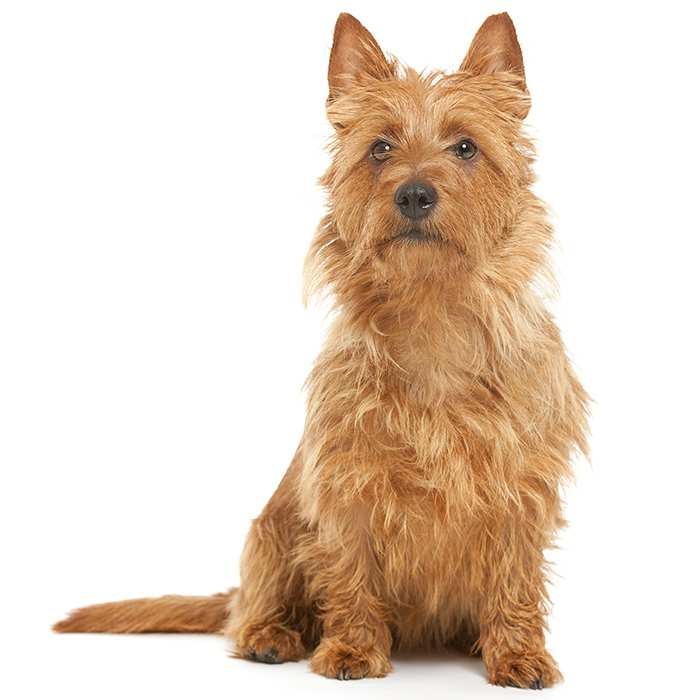




 hey dog is detected and its predicted breed is Australian terrier

customimages\australian-aussie-terrier-adult-stading-in-grass.jpg




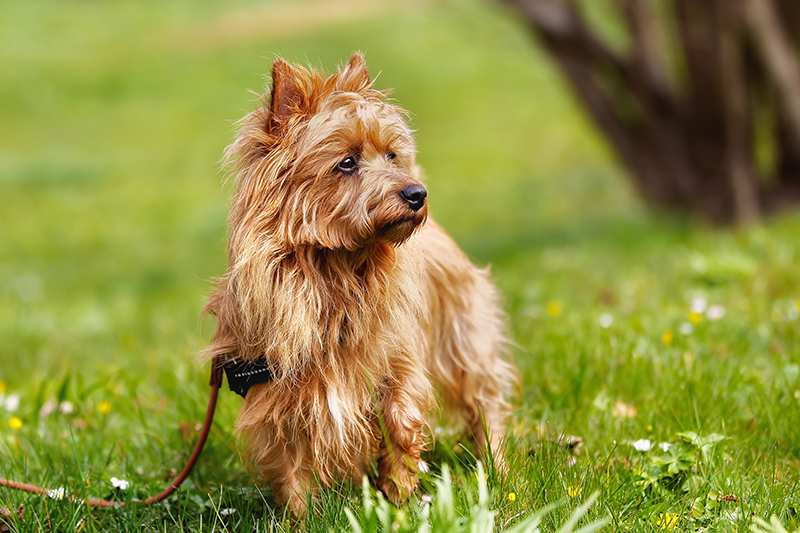




 hey dog is detected and its predicted breed is Australian terrier

customimages\blue-heeler-australian-cattledog-700x700.jpg




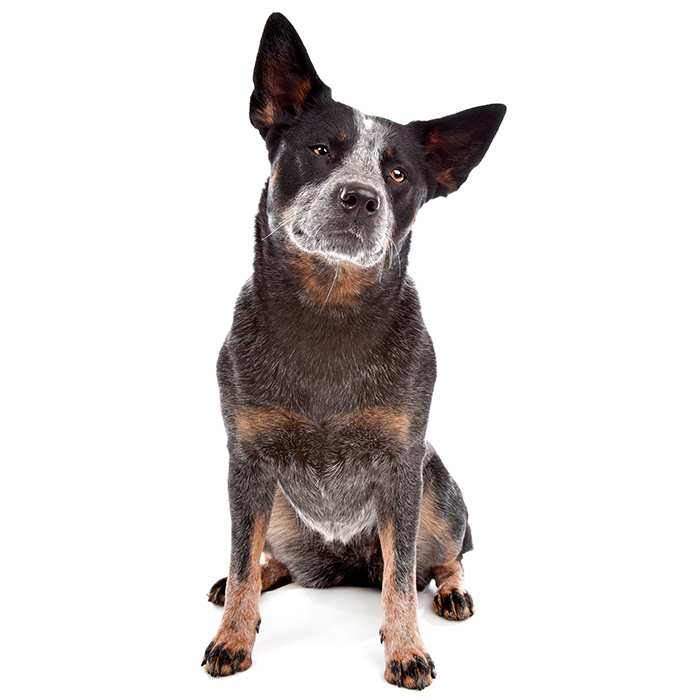




 hey dog is detected and its predicted breed is Australian cattle dog

customimages\blue-heeler-australian-cattledog-stalking-in-grass.jpg




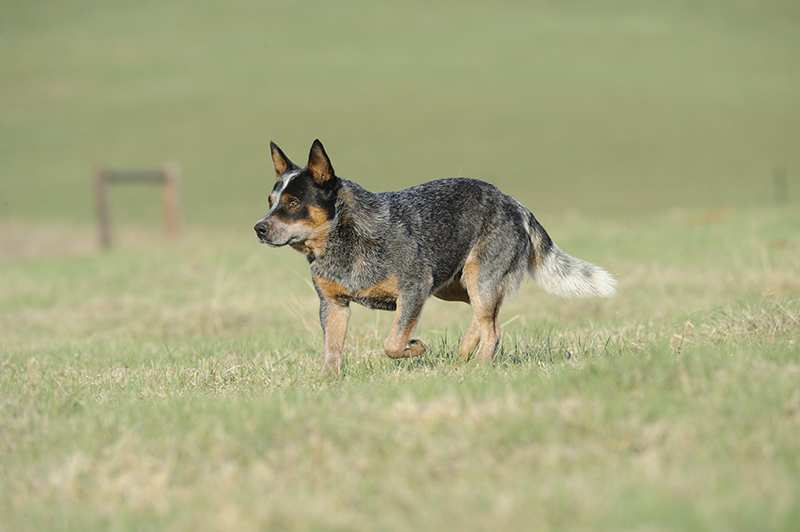




 hey dog is detected and its predicted breed is Australian cattle dog

customimages\cat.jpeg




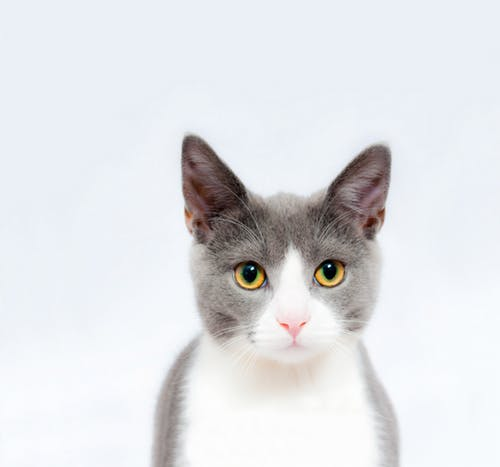




 Sorry !!customimages\cat.jpeg this is neither dog nor human!! 

customimages\chinesecrested.jpg




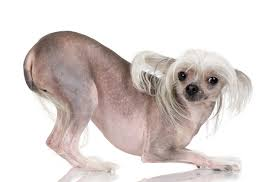




 hey dog is detected and its predicted breed is Chinese crested

customimages\german shephard.jpg




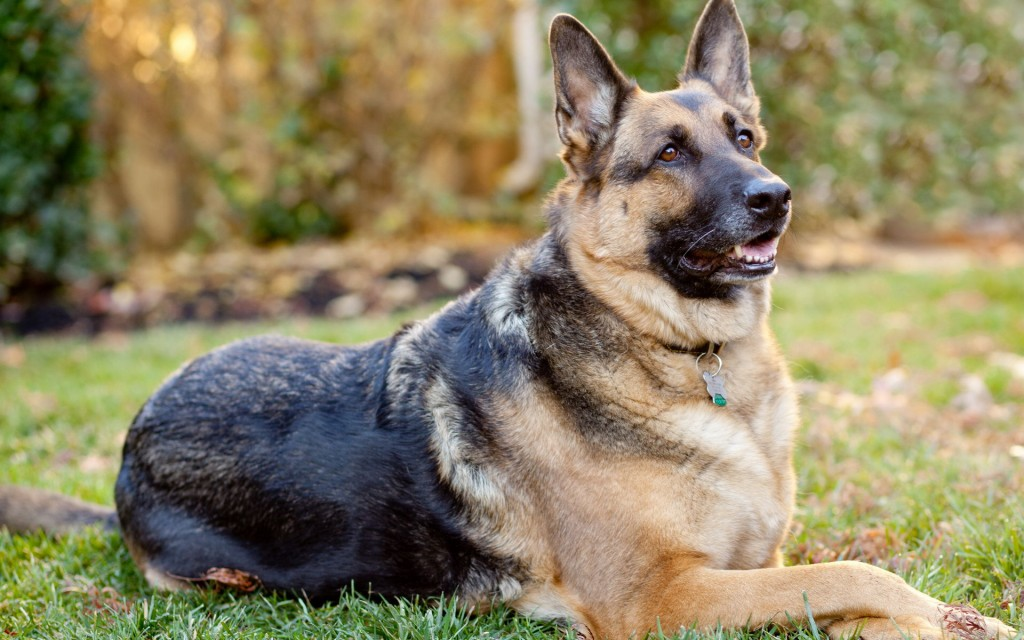




 hey dog is detected and its predicted breed is German shepherd dog

customimages\miley_cyrus_embed.jpg




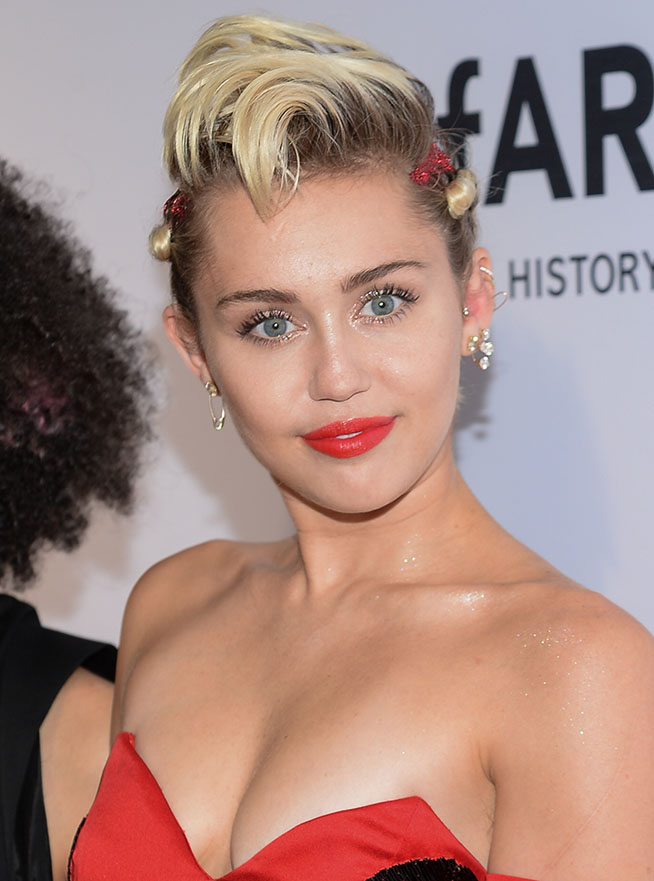




 This image is of human that very much looks like Chinese crested 

customimages\random1 scenary.jpg




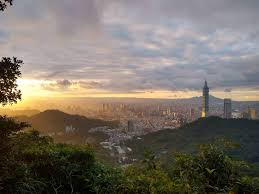




 Sorry !!customimages\random1 scenary.jpg this is neither dog nor human!! 

customimages\random2 scenary.jpg




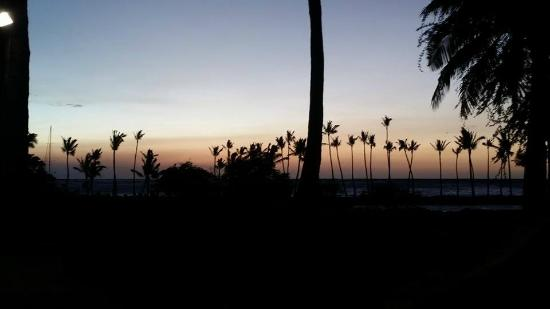




 Sorry !!customimages\random2 scenary.jpg this is neither dog nor human!! 

customimages\sophie turner.jpg




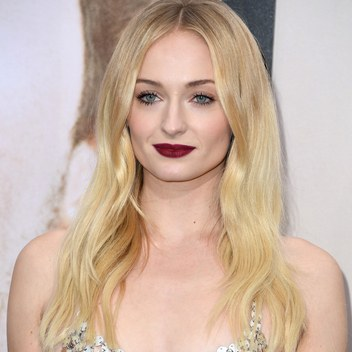




 This image is of human that very much looks like Chinese crested 



In [36]:
# load filenames for human and dog images
my_files = np.array(glob("customimages/*"))

### testing outside test mode
for file_path in my_files:
    print(file_path)
    run_app(file_path, False)

images\American_water_spaniel_00648.jpg




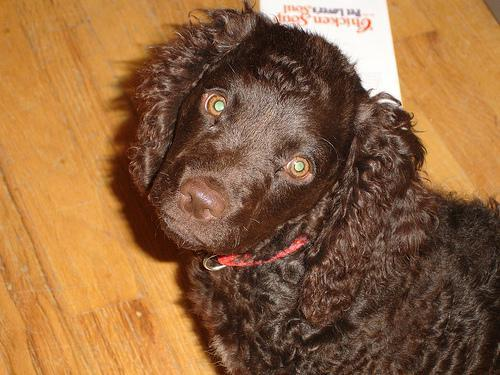




 hey dog is detected and its predicted breed is Curly-coated retriever

images\Brittany_02625.jpg




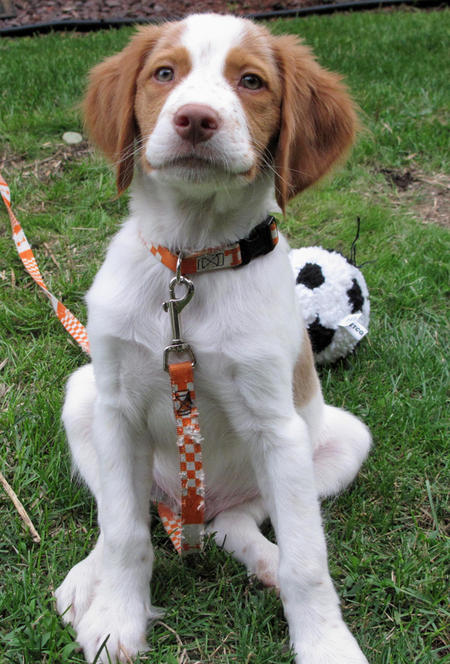




 hey dog is detected and its predicted breed is Brittany

images\Curly-coated_retriever_03896.jpg




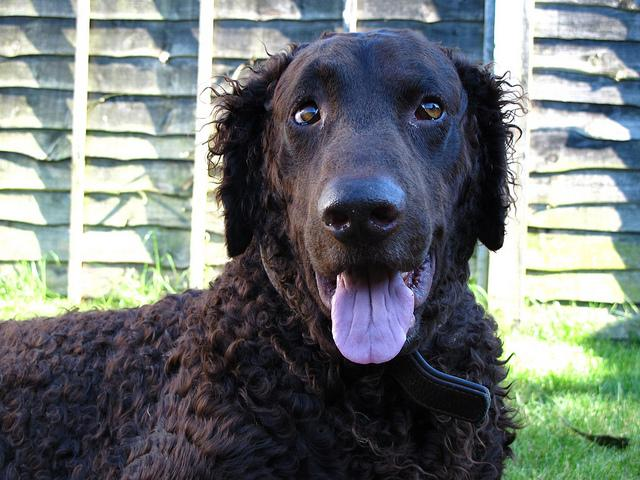




 hey dog is detected and its predicted breed is Curly-coated retriever

images\ezgif.com-gif-maker (1).jpg




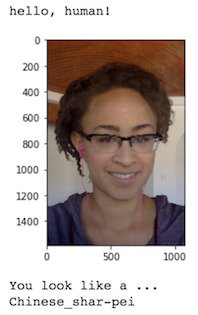




 This image is of human that very much looks like Neapolitan mastiff 

images\ezgif.com-gif-maker (2).jpg




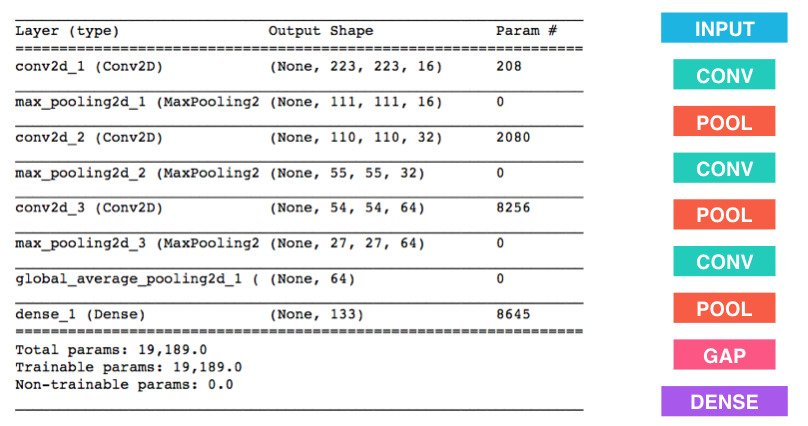




 Sorry !!images\ezgif.com-gif-maker (2).jpg this is neither dog nor human!! 

images\ezgif.com-gif-maker.jpg




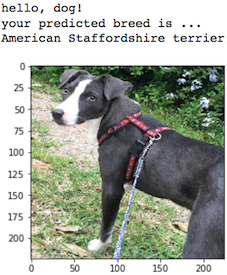




 hey dog is detected and its predicted breed is American staffordshire terrier

images\Labrador_retriever_06449.jpg




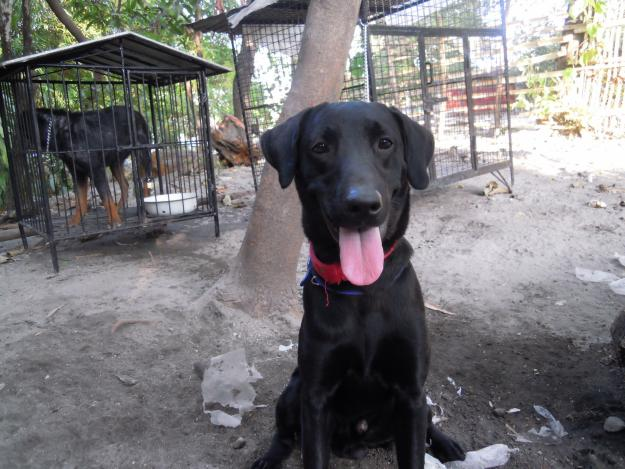




 hey dog is detected and its predicted breed is Labrador retriever

images\Labrador_retriever_06455.jpg




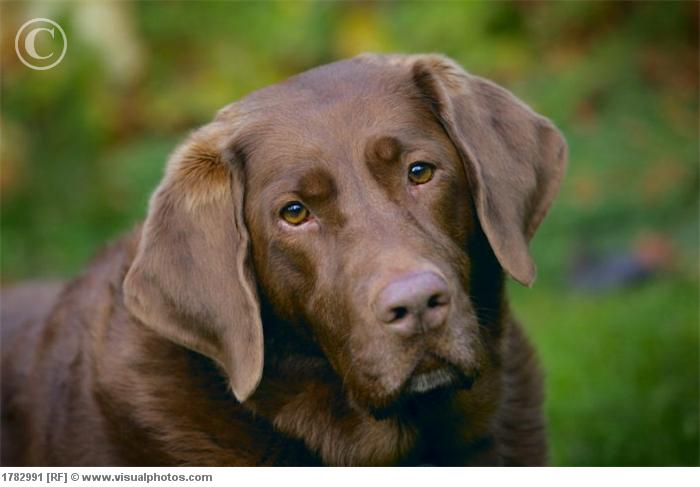




 hey dog is detected and its predicted breed is Labrador retriever

images\Labrador_retriever_06457.jpg




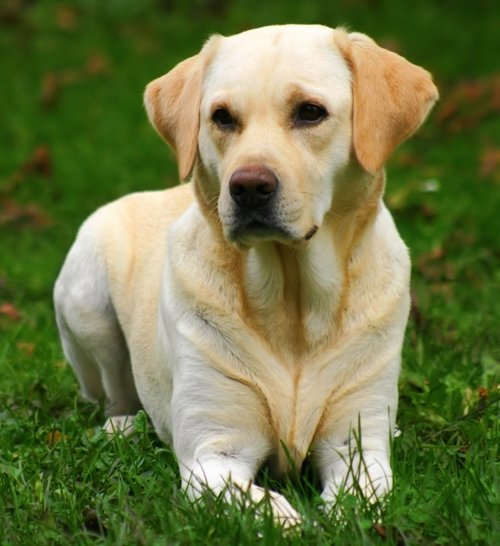




 hey dog is detected and its predicted breed is Labrador retriever

images\Welsh_springer_spaniel_08203.jpg




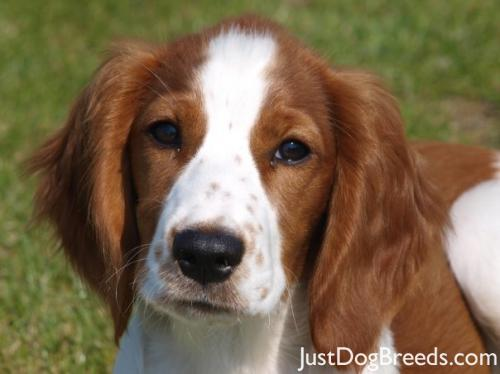




 hey dog is detected and its predicted breed is Welsh springer spaniel



In [32]:
# load filenames for human and dog images
my_files = np.array(glob("images/*"))

positions = []
for i, file in enumerate(my_files):
    ext = str(Path(file).parts[1]).split(".")[1]
    if ext == 'png':
        positions.append(i)
my_files = np.delete(my_files, positions)
### testing outside test mode
for file_path in my_files:
    print(file_path)
    run_app(file_path, False)